# Lead Scoring Case Study

## Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites, search engines, and even social media sometimes. Once these people land on the website, they might browse the courses, fill out a form for the course, or watch some videos. When these people fill out a form with their email address or phone number, they are classified as leads. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted into successful sales, while most of the leads do not. The typical lead to successful sale conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead-to-sale conversion rate is very poor. For example, if they acquire 100 leads in a day, only about 30 of them are converted into successful sales. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate would go up as the sales team would now be focusing more on communicating with the potential leads rather than making calls to everyone. 

In [67]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [68]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
pd.set_option('display.max_columns',False)

## Step 1 : Reading and Understanding the Data

In [70]:
lead_df=pd.read_csv('Leads.csv') # Reading leads dataframe as lead_df
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [71]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [72]:
# Getting the summary of the dataframe using 'describe()'
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [73]:
# Getting the shape of the dataset
lead_df.shape

(9240, 37)

## Step : 2 Data Cleaning

In [74]:
# Replacing Select values with nan values
lead_df = lead_df.replace('Select', np.nan)

In [75]:
lead_df.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

Here we found that lots of Missing values and it should be treated.

In [76]:
lead_df.loc[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [77]:
# Removing columns whch column containd more than 40% of Missing Values
cols=lead_df.columns[round((lead_df.isnull().sum()/len(lead_df))*100)>=40]
lead_df=lead_df.drop(cols,1)

In [78]:
# dropping 'Tags' as these features is derived by sales team
lead_df.drop('Tags',1,inplace=True)

In [79]:
# Finding the Labels contains in the Country Variable
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [80]:
# imputing  "India" as its common occurance in Country Column
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

In [81]:
# Finding the Labels contains in the Specialization Variable
lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [82]:
# Imputing  "Finance Management" as its common occurance in Specialization Column
lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'Finance Management')

In [83]:
# Finding the Labels contains in the "What is your current occupation" Variable
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [84]:
# Imputing  "Unemployed" as its common occurance in What is your current occupation Column
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [85]:
# Dropping "What matters most to you in choosing a course" as we do not require this
lead_df.drop('What matters most to you in choosing a course',1,inplace=True)

In [86]:
# Finding the Labels contains in the "Last Activity Variable
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [87]:
# Imputing "Email Opened" as its common occurance in Last Activity Column
lead_df['Last Activity']=lead_df['Last Activity'].fillna('Email Opened')

In [88]:
# Finding the Labels contains in the "Last Activity Variable
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [89]:
# imputing  "Google" as its common occurance in Lead Source Column
lead_df['Lead Source']=lead_df['Lead Source'].replace(np.nan,'Google')
lead_df['Lead Source']=lead_df['Lead Source'].replace('google','Google')

In [90]:
lead_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

### Outlier Detection

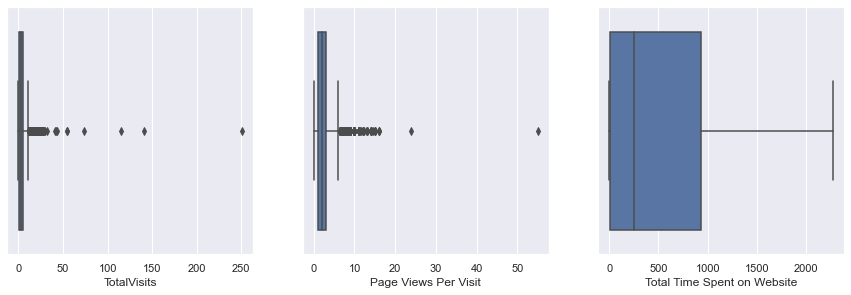

In [91]:
# Finding the outliers
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(lead_df['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(lead_df['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

Outliers are Present in both the Variables 
 TotalVisits 
 Page Views Per Visit 
 it should be treated


In [92]:
# Imputing Median as it is a Continuous type
lead_df['TotalVisits']=lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median())
lead_df['Page Views Per Visit']=lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())

### Again Checking for Null Values

In [93]:
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

No Null Values where found..

In [94]:
# making lead number as index
lead_df=lead_df.set_index('Lead Number')
lead_df.drop(['Prospect ID'],1,inplace=True)

In [95]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 
col_obj=list(lead_df.loc[:, lead_df.dtypes == np.object].columns)
col_num=list(lead_df.loc[:, lead_df.dtypes == np.int64].columns)
col_num+=(list(lead_df.loc[:, lead_df.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_obj,col_num))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']


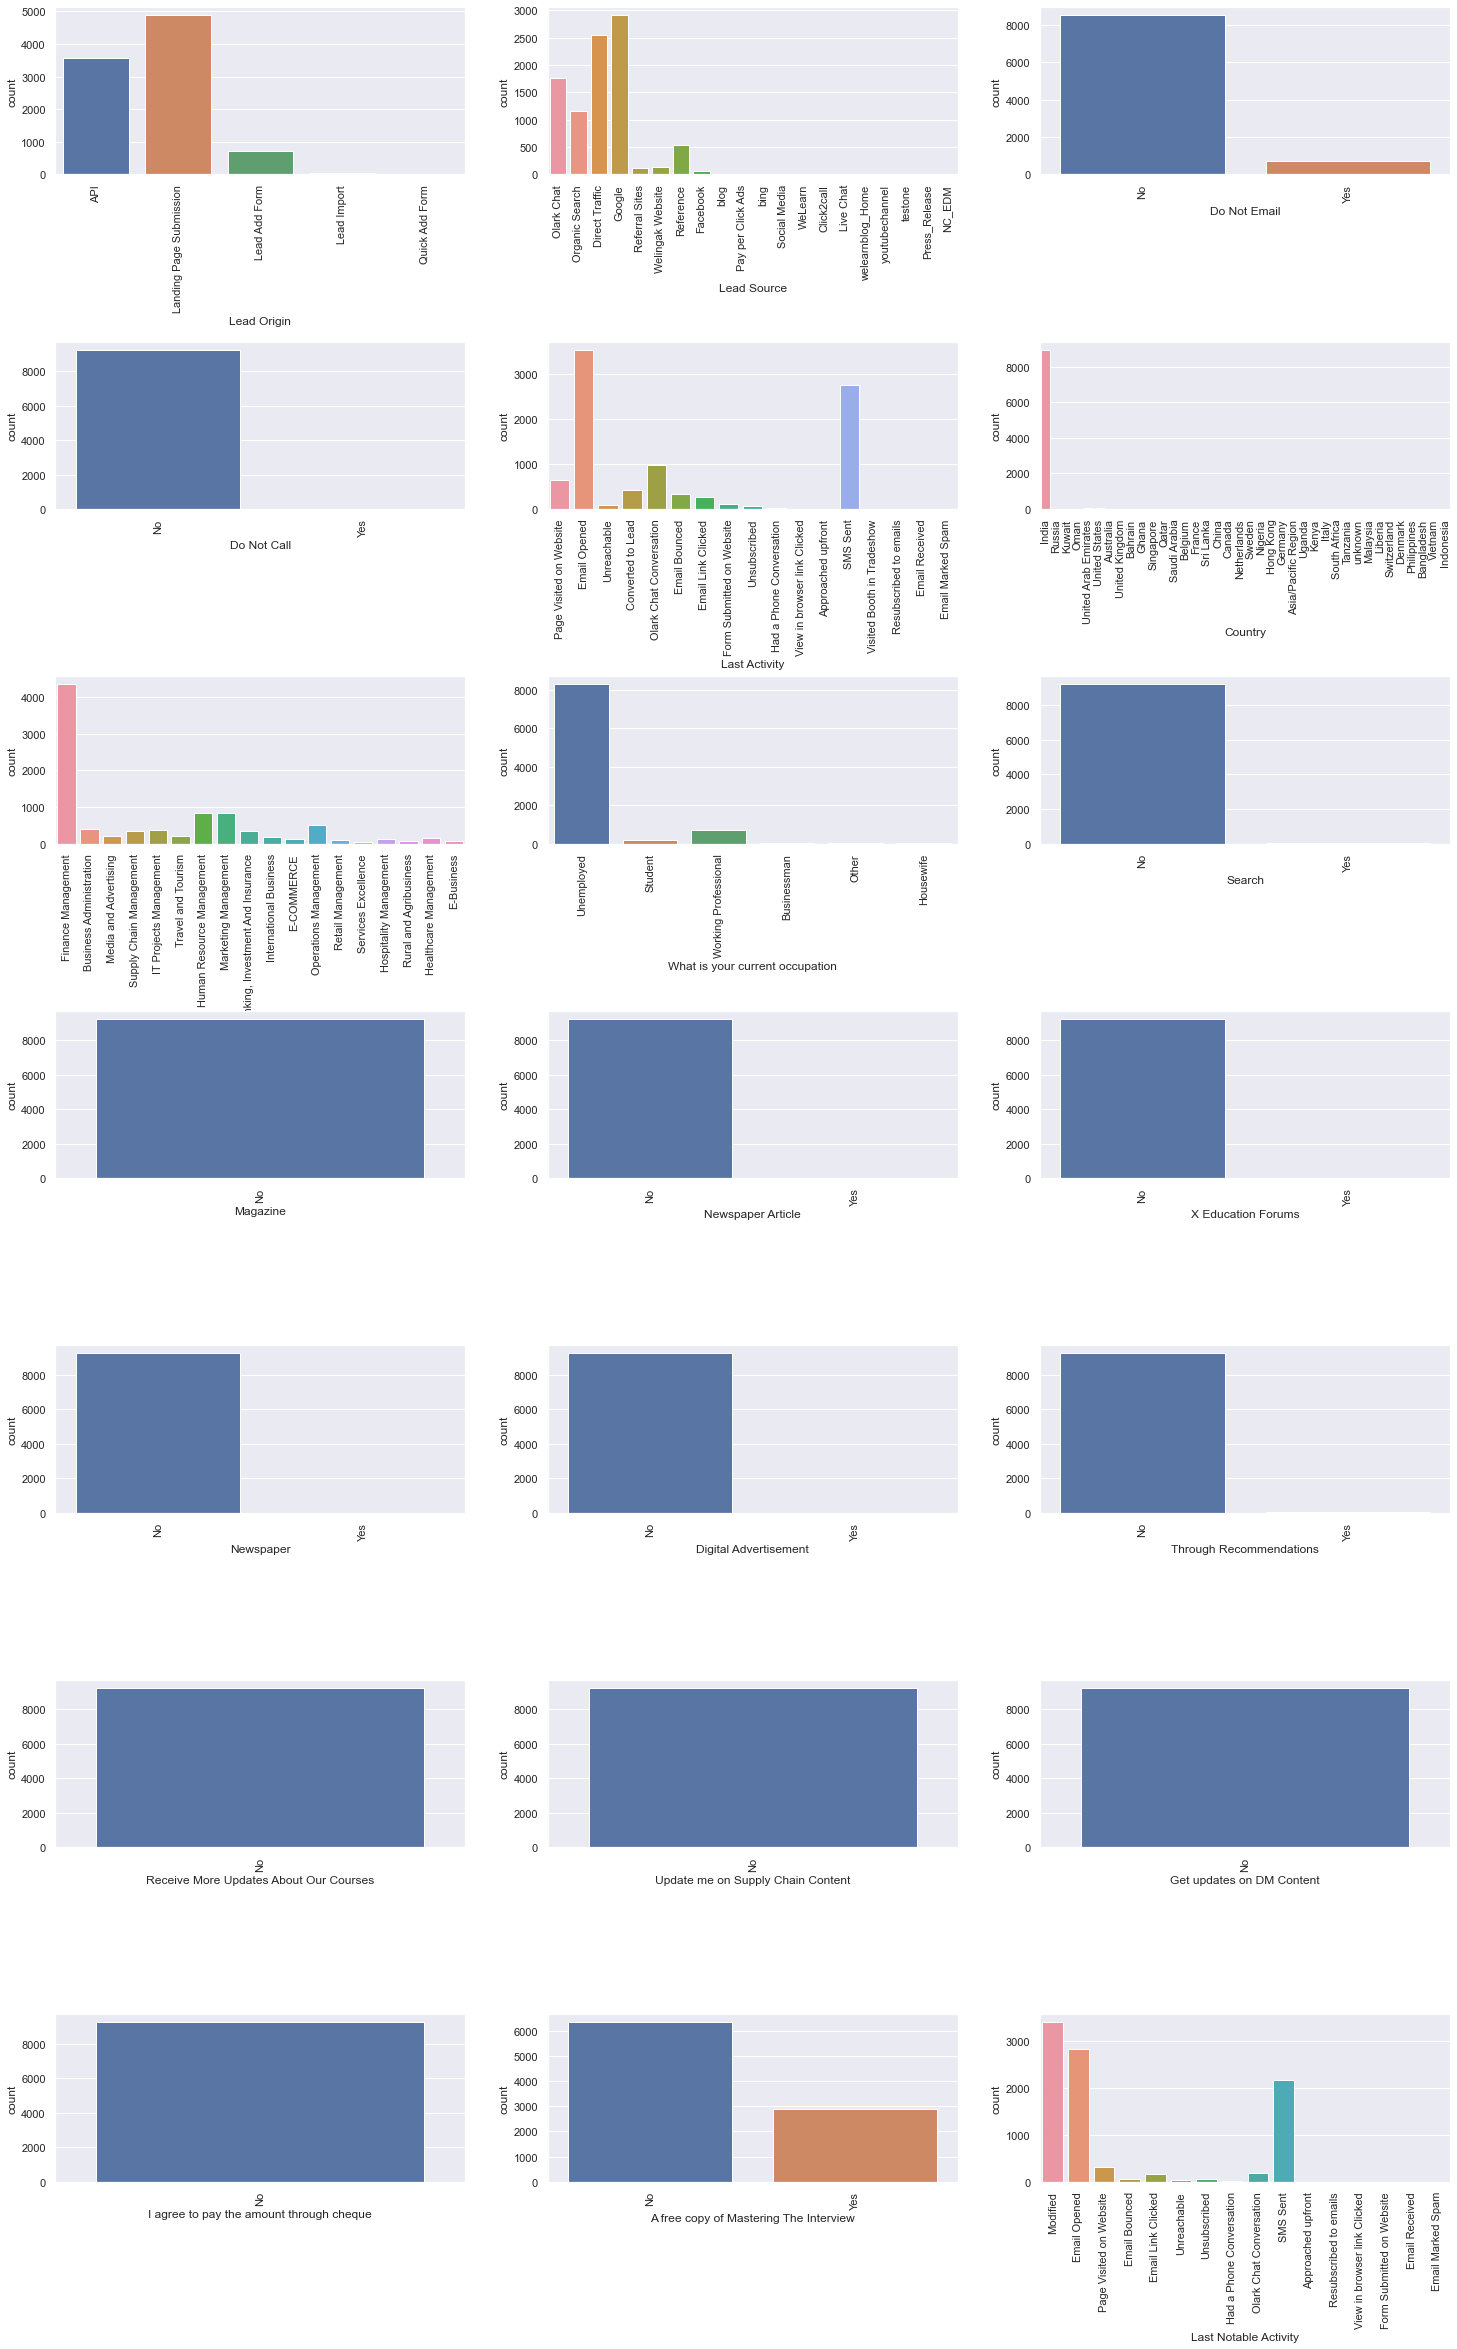

In [96]:
# plotting countplot for object dtype and histogram for number to get data distribution
plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(i[1],data=lead_df) 
    plt.xticks(rotation=90)
plt.show()

#### Insights 
- We obtained countplot for object dtype and histogram for number to get data distribution.

- We can see that there are many colums which are highly skewed or only one values like magzines, get updates on DM content etc. we Can remove these colums.
 

In [97]:
# Taking care of highly skewed coloumns
lead_df=lead_df.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',\
                      'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)
# Droping those variables which contains two labels but one is very High and another is very less number of labels.
lead_df=lead_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',\
                      'Get updates on DM Content','I agree to pay the amount through cheque', ],1)
col_obj=lead_df.loc[:, lead_df.dtypes == np.object].columns

Maintaing the labels which Column contains lots of labels

In [98]:
# changing categories which are occured less than 1000
col_dict_ls=dict(lead_df['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_df['Lead Source']=lead_df['Lead Source'].replace(i,'Other')

In [99]:
# Changing categories which are occured less than 300
col_dict_la=dict(lead_df['Last Activity'].value_counts()<300)
# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        lead_df['Last Activity']=lead_df['Last Activity'].replace(i,'Other')

In [100]:
# Changing categories which are occured less than 350
col_dict_spec=dict(lead_df['Specialization'].value_counts()<350)
# labels which are occured less like E-Business,Retail Management we can impute to 'Other'

for i in col_dict_spec.keys():
    if col_dict_spec[i]==True:
        lead_df['Specialization']=lead_df['Specialization'].replace(i,'Other')

##  Exploratory Data Analysis

Univariate Analysis (Categorical)

In [101]:
# crating cols which contains only Categorical variable
cols=lead_df.loc[:, lead_df.dtypes == np.object].columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

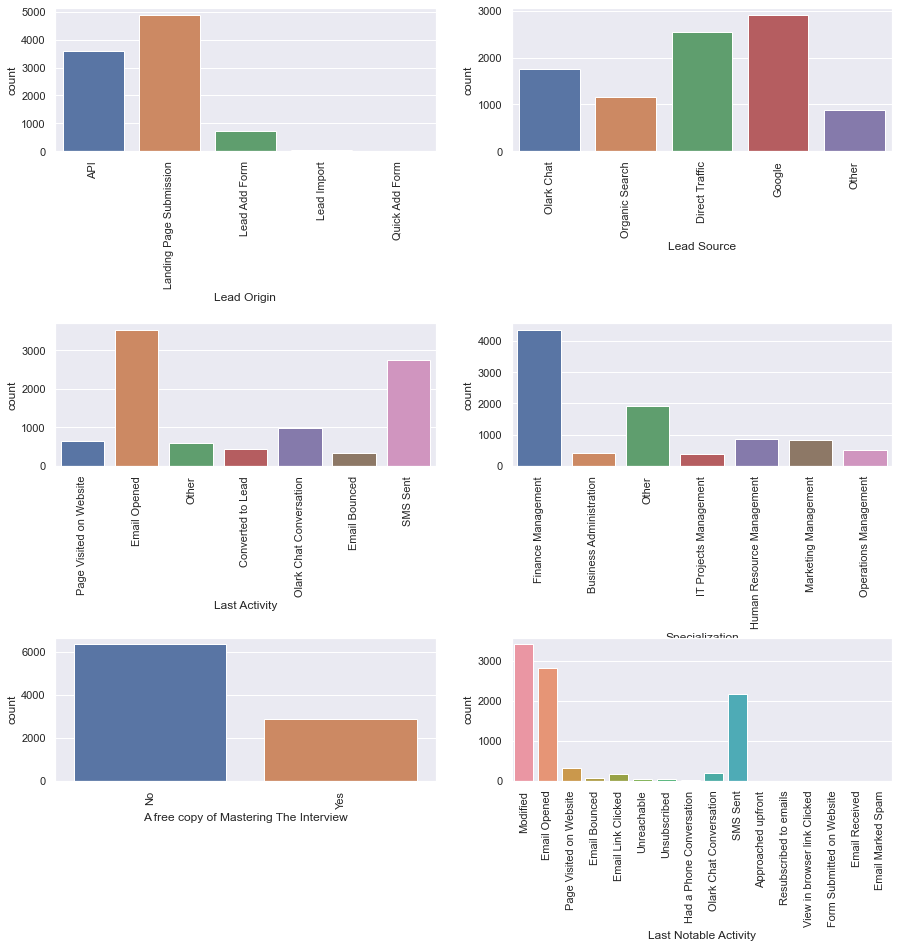

In [102]:
plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=lead_df)
    plt.xticks(rotation=90)
plt.show()

#### Insights :-
    - In Lead Source Direct Traffic and Google are the two main source for Leads
    - The Number of values is High in Email Opened and SMS Sent in Last Activity
    - Most of the people chooses Finance Management Specialization rather than other 
      Specialization

Univariate Analysis(Contenious)

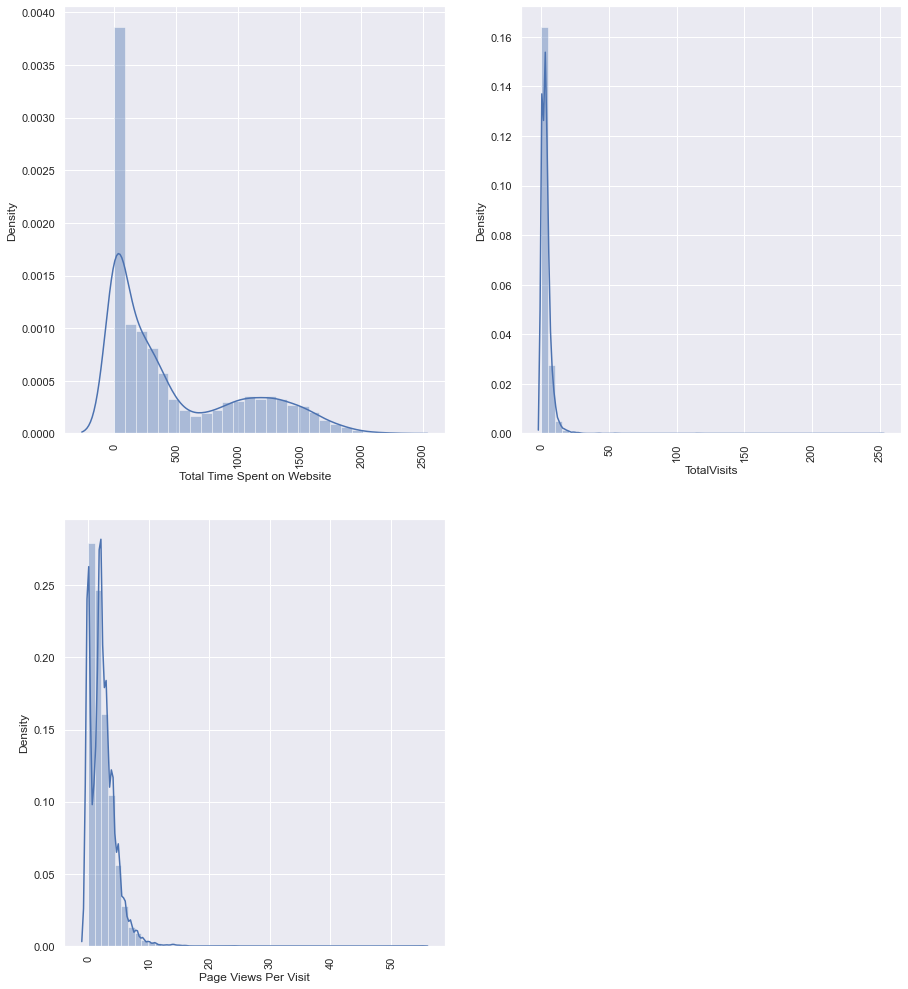

In [103]:
col_num.remove('Converted')

plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(lead_df[i[1]])
    
    plt.xticks(rotation=90)
plt.show()

#### Insights :-
- None of the Continueous Variables are in Normal distribution
- Presence of Outliers in Total Visits and Page Views Per Visit
- In total visits more values is between 0-50 and page views per visits 0-20

### Bivariate Analysis

Bivariate Analysis With respect to Target Column Converted

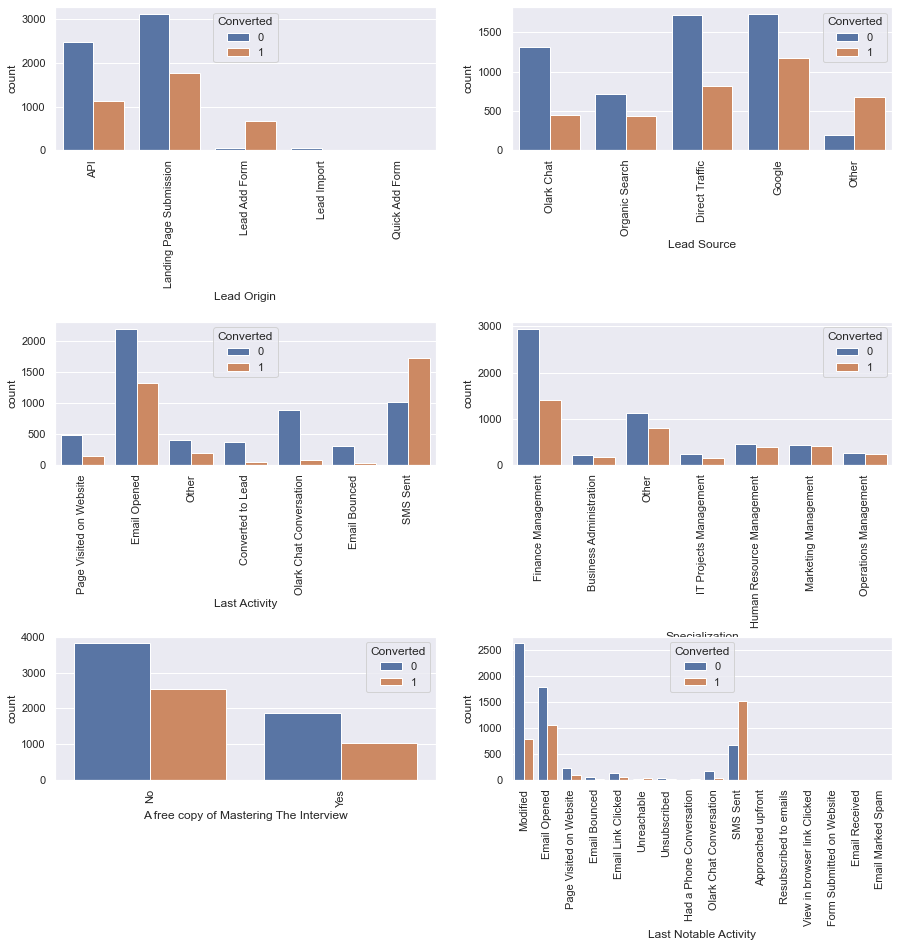

In [104]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead_df)
    plt.xticks(rotation=90)
plt.show()

#### Insights :-
- In Lead Source The number of Hot leads is higher in Direct Traffic and Google less in Other Category
- In Last Activity the number of Hot leads is higher in SMS and in EMAIL cold leads is higher than hot leads.
- In Last Notable Activity it's mostly same as Last Activity.

## Data Preparation and Features Selection

In [105]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [106]:
# mapping of columns

lead_df['A free copy of Mastering The Interview']=lead_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [107]:
# Dropping the Last Notable Activity since maximum same.
lead_df.drop('Last Notable Activity',1,inplace=True)

Creating duplicates of Categorical Variables

In [108]:
lead_copy_df=pd.get_dummies(lead_df)
lead_copy_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


##  Splitting the Data into Training and Testing Sets

In [109]:
X=lead_copy_df.iloc[:,1:]
y=lead_copy_df[['Converted']]

In [110]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

### scaling the Features 

In [111]:
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

### Correlation 

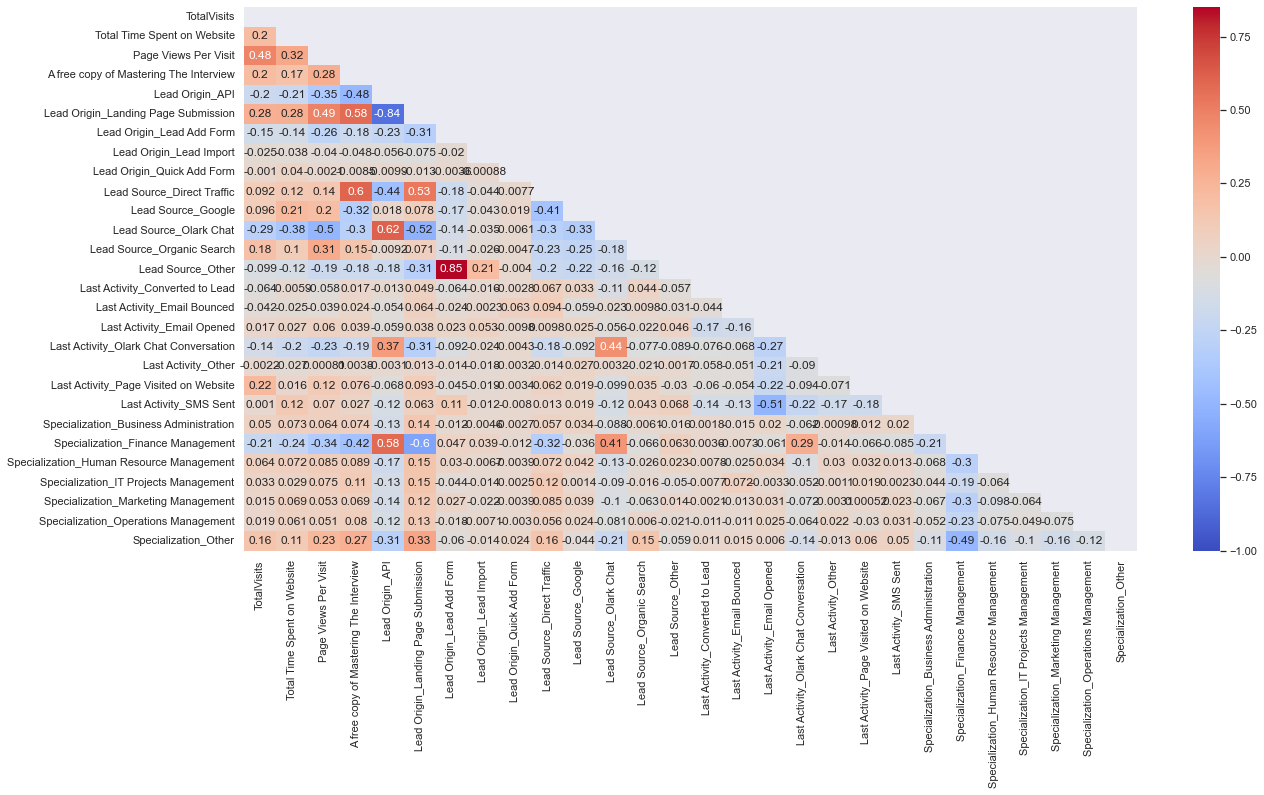

In [112]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(20, 10))
mask = np.zeros(correlation_matrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(correlation_matrix, annot=True, vmin=-1, cmap='coolwarm', mask=mask)
plt.show()

- We can see some columns are highly correlated
- let the RFE feature to decide which columns to drop or not

In [113]:
# Using rfe for features selection
logreg=LogisticRegression()

In [114]:
# Running RFE with the output number of the variable equal to 20
rfe=RFE(estimator=logreg, n_features_to_select=20)    # running RFE
rfe=rfe.fit(X_train,y_train)

In [115]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False, False,  True,  True,
       False])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other', False, 6),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Reso

In [117]:
# RFE selected variables thats should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Last Activity_SMS Sent',
       'Specialization_Finance Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management'],
      dtype='object')

In [118]:
# Variables selected by RFE feauter that should not be used for modeling
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Other', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management', 'Specialization_Other'],
      dtype='object')

##  Building a Logistic Regression using statsmodel.

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.6
Date:                Sun, 22 Oct 2023   Deviance:                       5813.2
Time:                        12:51:29   Pearson chi2:                 6.69e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3499
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.6687   2955.062      0.001      0.999   -5789.145    5794.483
TotalVisits                               0.1843      0.056      3.301      0.001       0.075       0.294
Total Time Spent on Website               1.1049      0.038     28.763      0.000       1.030       1.180
Page Views Per Visit                     -0.1513      0.051     -2.941      0.003      -0.252      -0.050
Lead Origin_API                          -4.0221   2955.062     -0.001      0.999   -5795.836    5787.792
Lead Origin_Landing Page Submission      -4.3278   2955.062     -0.001      0.999   -5796.142    5787.486
Lead Origin_Lead Add Form                -0.3340   2955.062     -0.000      1.000   -5792.148    5791.480
Lead Origin_Lead Import                  -4.1293   2955.062     -0.001      0.999   -5795.944    5787.685
Lead Origin_Quick Add Form               15.4819   1.48e+04      0.001      0.999   -2.89e+04     2.9e+04
Lead Source_Direct Traffic               -0.3550      0.090     -3.950      0.000      -0.531      -0.179
Lead Source_Olark Chat                    0.9008      0.129      6.987      0.000       0.648       1.154
Lead Source_Organic Search               -0.1137      0.108     -1.051      0.293      -0.326       0.098
Last Activity_Converted to Lead          -0.3393      0.239     -1.417      0.156      -0.808       0.130
Last Activity_Email Bounced              -1.1164      0.309     -3.610      0.000      -1.723      -0.510
Last Activity_Email Opened                0.7407      0.148      5.016      0.000       0.451       1.030
Last Activity_Olark Chat Conversation    -1.0407      0.214     -4.862      0.000      -1.460      -0.621
Last Activity_Other                       0.4729      0.189      2.502      0.012       0.102       0.843
Last Activity_SMS Sent                    1.8293      0.151     12.154      0.000       1.534       2.124
Specialization_Finance Management        -0.4244      0.090     -4.699      0.000      -0.601      -0.247
Specialization_Marketing Management       0.1486      0.118      1.258      0.208      -0.083       0.380
Specialization_Operations Management      0.1872      0.143      1.307      0.191      -0.094       0.468
=========================================================================================================
"""

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,10.67
3,Lead Origin_API,9.84
13,Last Activity_Email Opened,4.21
16,Last Activity_SMS Sent,3.89
14,Last Activity_Olark Chat Conversation,2.67
5,Lead Origin_Lead Add Form,2.50
9,Lead Source_Olark Chat,2.42
2,Page Views Per Visit,2.02
17,Specialization_Finance Management,1.89
15,Last Activity_Other,1.84


Lead Source_Other is insignificant because it has high p-value in presence of other variables so it should be dropped

In [121]:
col=col.drop('Lead Origin_Lead Add Form',1)
col=col.drop('Last Activity_Other',1)
col=col.drop('Lead Source_Organic Search',1)
col=col.drop('Lead Origin_Quick Add Form',1)

## Model 2

In [122]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2910.3
Date:                Sun, 22 Oct 2023   Deviance:                       5820.6
Time:                        12:56:09   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3491
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.5749      0.207     12.456      0.000       2.170       2.980
TotalVisits                               0.1574      0.052      3.043      0.002       0.056       0.259
Total Time Spent on Website               1.1048      0.038     28.823      0.000       1.030       1.180
Page Views Per Visit                     -0.1533      0.050     -3.043      0.002      -0.252      -0.055
Lead Origin_API                          -3.7106      0.201    -18.489      0.000      -4.104      -3.317
Lead Origin_Landing Page Submission      -4.0108      0.204    -19.614      0.000      -4.412      -3.610
Lead Origin_Lead Import                  -3.7985      0.499     -7.609      0.000      -4.777      -2.820
Lead Source_Direct Traffic               -0.3338      0.086     -3.887      0.000      -0.502      -0.165
Lead Source_Olark Chat                    0.9241      0.128      7.222      0.000       0.673       1.175
Last Activity_Converted to Lead          -0.6021      0.215     -2.801      0.005      -1.023      -0.181
Last Activity_Email Bounced              -1.3760      0.291     -4.728      0.000      -1.946      -0.806
Last Activity_Email Opened                0.4915      0.106      4.643      0.000       0.284       0.699
Last Activity_Olark Chat Conversation    -1.2956      0.186     -6.948      0.000      -1.661      -0.930
Last Activity_SMS Sent                    1.5766      0.109     14.425      0.000       1.362       1.791
Specialization_Finance Management        -0.4208      0.090     -4.662      0.000      -0.598      -0.244
Specialization_Marketing Management       0.1625      0.118      1.382      0.167      -0.068       0.393
Specialization_Operations Management      0.2065      0.143      1.445      0.149      -0.074       0.487
=========================================================================================================
"""

In [123]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,5.21
3,Lead Origin_API,5.07
13,Specialization_Finance Management,3.25
10,Last Activity_Email Opened,2.95
7,Lead Source_Olark Chat,2.88
12,Last Activity_SMS Sent,2.40
6,Lead Source_Direct Traffic,2.02
11,Last Activity_Olark Chat Conversation,1.95
2,Page Views Per Visit,1.88
8,Last Activity_Converted to Lead,1.36


Specialization_Marketing Management ,Specialization_Operations Management is insignificant because it has high p-value in presence of other variables so it should be dropped

In [124]:
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,5.21
3,Lead Origin_API,5.07
13,Specialization_Finance Management,3.25
10,Last Activity_Email Opened,2.95
7,Lead Source_Olark Chat,2.88
12,Last Activity_SMS Sent,2.40
6,Lead Source_Direct Traffic,2.02
11,Last Activity_Olark Chat Conversation,1.95
2,Page Views Per Visit,1.88
8,Last Activity_Converted to Lead,1.36


In [125]:
col=col.drop('Specialization_Marketing Management',1)
col=col.drop('Specialization_Operations Management',1)

## Model 3

In [126]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2912.0
Date:                Sun, 22 Oct 2023   Deviance:                       5824.1
Time:                        12:58:51   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3488
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.6204      0.205     12.773      0.000       2.218       3.023
TotalVisits                               0.1527      0.051      2.990      0.003       0.053       0.253
Total Time Spent on Website               1.1047      0.038     28.838      0.000       1.030       1.180
Page Views Per Visit                     -0.1564      0.050     -3.108      0.002      -0.255      -0.058
Lead Origin_API                          -3.7005      0.200    -18.459      0.000      -4.093      -3.308
Lead Origin_Landing Page Submission      -4.0083      0.204    -19.618      0.000      -4.409      -3.608
Lead Origin_Lead Import                  -3.8060      0.500     -7.617      0.000      -4.785      -2.827
Lead Source_Direct Traffic               -0.3328      0.086     -3.878      0.000      -0.501      -0.165
Lead Source_Olark Chat                    0.9178      0.128      7.182      0.000       0.667       1.168
Last Activity_Converted to Lead          -0.6053      0.215     -2.817      0.005      -1.026      -0.184
Last Activity_Email Bounced              -1.3729      0.291     -4.720      0.000      -1.943      -0.803
Last Activity_Email Opened                0.4952      0.106      4.680      0.000       0.288       0.703
Last Activity_Olark Chat Conversation    -1.2911      0.186     -6.928      0.000      -1.656      -0.926
Last Activity_SMS Sent                    1.5788      0.109     14.449      0.000       1.365       1.793
Specialization_Finance Management        -0.4764      0.085     -5.610      0.000      -0.643      -0.310
=========================================================================================================
"""

In [127]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,5.06
3,Lead Origin_API,4.94
13,Specialization_Finance Management,2.94
10,Last Activity_Email Opened,2.90
7,Lead Source_Olark Chat,2.88
12,Last Activity_SMS Sent,2.36
6,Lead Source_Direct Traffic,2.02
11,Last Activity_Olark Chat Conversation,1.94
2,Page Views Per Visit,1.87
8,Last Activity_Converted to Lead,1.36


- Here we got all the p-value are under 0.05 and VIF is also under 5
- It can take as a Final Model

In [130]:
# Prediciting values on ytrain
y_train_pred = logm3.predict(X_train_sm).values.reshape(-1)

In [131]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.145890,609431
1,0,0.055113,631817
2,0,0.063937,596164
3,0,0.157683,646570
4,0,0.037177,643974


In [132]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [133]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.145890,609431,0
1,0,0.055113,631817,0
2,0,0.063937,596164,0
3,0,0.157683,646570,0
4,0,0.037177,643974,0


In [134]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [135]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.8011750154607298, Sensitivity 0.6828872668288727, specitiy 0.8740629685157422


Here we got low Sensitivity when randomly take the Cutoff as 0.5

In [136]:
# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3498,  504],
       [ 782, 1684]], dtype=int64)

In [137]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.show()
    

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

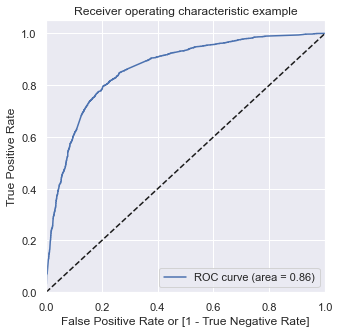

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Making Prediction on test set

Scaling on Test Set

In [143]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [145]:
#Adding constant
X_test_sm = sm.add_constant(X_test[col])
#Making prediction
y_test_pred = logm3.predict(X_test_sm)
y_test_pred[:10]

Lead Number
639211    0.846659
590711    0.877904
644174    0.480732
641392    0.288236
587955    0.842841
593130    0.115075
648319    0.055113
636722    0.942080
648231    0.812906
637858    0.219155
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [147]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [149]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,639211,0.846659
1,1,590711,0.877904
2,1,644174,0.480732
3,0,641392,0.288236
4,1,587955,0.842841


In [150]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [151]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,639211,0.846659,1
1,1,590711,0.877904,1
2,1,644174,0.480732,1
3,0,641392,0.288236,0
4,1,587955,0.842841,1


In [152]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [153]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7878787878787878, Sensitivity 0.7735159817351598, specitiy 0.7972570065593322  


- We can see that our model is doing well in test set also
- Sensitivity means how our model is telling that actually converted and model prdecited them as as converted. 
- We can see that our     model is giving about .77 sensitivity.
- it means that 77 percent time our model is able to predict (actually)converted as (prdicited)converted.

## Conclusion :-
- We have noted that the variables that important the most in the potential buyers are:
    - The total time spend on the Website.
    - Total number of visits.